In [24]:
# Helper
# Below listed functions used on the main convex hull program

import numpy as np

def sorter(data):
    # Key used for array sorting
    x = data[0]
    y = data[1]
    return (x, y)

def checkPosition(p1, p2, px):
    # Checks the position of a point based on a given line consisted of two points
    # (+) means point is located on the top/leftside of the line
    # (-) means point is located on the bottom/rightside of the line
    det = p1[0]*p2[1] + px[0]*p1[1] + p2[0]*px[1] - px[0]*p2[1] - p2[0]*p1[1] - p1[0]*px[1]
    return det

def pointDistance(p1, p2):
    # Returns the distance value between two points
    P1 = np.array([p1[0], p1[1]])
    P2 = np.array([p2[0], p2[1]])
    distance = np.linalg.norm(P2 - P1)
    return distance

def pointDistanceMax(sortedData, pLeft, pRight):
    # Returns the maximum distance of a set of points to line made by two points
    maxDistance = 0
    point = []
    for i in range(len(sortedData)):
        distance = pointToLine(pLeft, pRight, sortedData[i])
        if (distance > maxDistance):
            maxDistance = distance
            point = sortedData[i]
    return point

def pointToLine(p1, p2, p3):
    # Returns the distance value of a point p3 to line
    P1 = np.array([p1[0], p1[1]])
    P2 = np.array([p2[0], p2[1]])
    P3 = np.array([p3[0], p3[1]])
    distance = np.abs(np.cross(P2 - P1, P3 - P1) / np.linalg.norm(P2 - P1))
    return distance

def divideTop(p1, pn, data):
    # Returns an array of points lie above/leftside the pivot line
    left = []
    for i in range(len(data)):
        det = checkPosition(p1, pn, data[i])
        if (det > 0) and (data[i] != p1).any() and (data[i] != pn).any():
            left.append(data[i])
    return left

def divideBot(p1, pn, data):
    # Returns an array of points lie below/rightside the pivot line
    right = []
    for i in range(len(data)):
        det = checkPosition(p1, pn, data[i])
        if (det < 0) and (data[i] != p1).any() and (data[i] != pn).any():
            right.append(data[i])
    return right

def getIndex(value, data):
    # Returns index of point value based on index from data
    for i in range(len(data)):
        if (value[0] == data[i][0]) and (value[1] == data[i][1]):
            return i

In [25]:
# My Convex Hull
# Below listed main function of my own convex hull program

import numpy as np
import pandas as pd

def ConvexHull(data):
    # Returns array of set of indexes from the sorted data
    #       Example: [[0, 2], [2, 3], [3, 0]]
    # The sets of indexes will be plotted as lines shaped as the edge of the convex hull
    # This main function calls the recursive FindHull function in which the divide and conquer algorithm is applied
    hull = []

    # Find the extreme points
    dataSorted = sorted(data, key=sorter)
    p1 = dataSorted[0]
    pn = dataSorted[len(dataSorted) - 1]
    
    # Divide points based on pivot line
    left = divideTop(p1, pn, data)
    right = divideBot(p1, pn, data)
    leftHull = FindHull(dataSorted, left, p1, pn)
    rightHull = FindHull(dataSorted, right, pn, p1)

    # Conquer
    hull = leftHull + rightHull

    return hull

def FindHull(data, filteredData, a, b):
    # Returns array of set of indexes from a small part of the whole data
    #       Example: [[0, 2], [2, 3], [3, 0]]
    # Output will be merged with another FindHull output in the main ConvexHull function
    if (len(filteredData) == 0):        # Base Case
        aIndex = getIndex(a, data)
        bIndex = getIndex(b, data)
        return [[aIndex, bIndex]]
    else:                               # Recursive
        # Farthest point
        c = pointDistanceMax(filteredData, a, b)

        # Divide points based on pivot line
        left1 = divideTop(a, c, filteredData)
        left2 = divideTop(c, b, filteredData)
        S1 = FindHull(data, left1, a, c)
        S2 = FindHull(data, left2, c, b)

        # Conquer
        S = S1 + S2
        return S

============ CONVEX HULL ============
Which dataset do you want to use?
1. Iris Plants
2. Breast Cancer
3. Wine Recognition
Which data visualization do you want to see?
1. Alcohol vs Proanthocyanins
2. Malic Acid vs Color Intensity


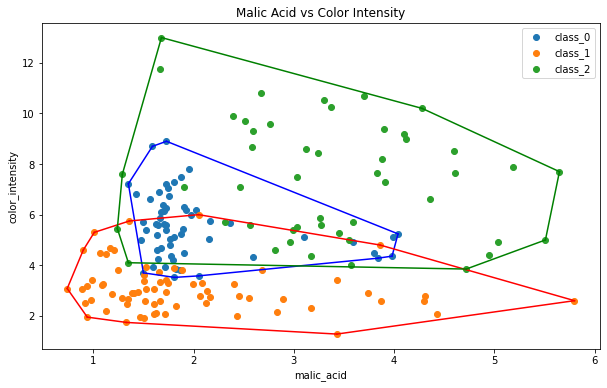

In [26]:
# Main Program

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# ###########
# Interface
print("============ CONVEX HULL ============")
print("Which dataset do you want to use?")
print("1. Iris Plants")
print("2. Breast Cancer")
print("3. Wine Recognition")
dataOption = int(input(">> "))

print("Which data visualization do you want to see?")
if (dataOption == 1):
    data = datasets.load_iris()
    print("1. Petal Width vs Petal Length")
    print("2. Sepal Width vs Sepal Length")
    setOption = int(input(">> "))
    if (setOption == 1):
        columnIndex = [0, 1]
    elif (setOption == 2):
        columnIndex = [2, 3]
    else:
        print("Input invalid!")
elif (dataOption == 2):
    data = datasets.load_breast_cancer()
    print("1. Radius vs Concavity")
    print("2. Area vs Fractal Dimension")
    setOption = int(input(">> "))
    if (setOption == 1):
        columnIndex = [0, 6]
    elif (setOption == 2):
        columnIndex = [3, 9]
    else:
        print("Input invalid!")
elif (dataOption == 3):
    data = datasets.load_wine()
    print("1. Alcohol vs Proanthocyanins")
    print("2. Malic Acid vs Color Intensity")
    setOption = int(input(">> "))
    if (setOption == 1):
        columnIndex = [0, 8]
    elif (setOption == 2):
        columnIndex = [1, 9]
    else:
        print("Input invalid!")
else:
    print("Input invalid!")


# ###########
# Data Setting
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)


# ###########
# Visualization
plt.figure(figsize = (10, 6))
colors = ['b','r','g']

if (dataOption == 1):
    if (setOption == 1):
        plt.title('Petal Width vs Petal Length')
    elif (setOption == 2):
        plt.title('Sepal Width vs Sepal Length')
elif (dataOption == 2):
    if (setOption == 1):
        plt.title('Radius vs Concavity')
    elif (setOption == 2):
        plt.title('Area vs Fractal Dimension')
elif (dataOption == 3):
    if (setOption == 1):
        plt.title('Alcohol vs Proanthocyanins')
    elif (setOption == 2):
        plt.title('Malic Acid vs Color Intensity')

plt.xlabel(data.feature_names[columnIndex[0]])
plt.ylabel(data.feature_names[columnIndex[1]])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[columnIndex[0],columnIndex[1]]].values
    hull = ConvexHull(bucket)
    bucket = bucket[np.lexsort((bucket[:, 1], (bucket[:,0])))]
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()